In [3]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras import backend as K

In [4]:
# Loading MNIST data having images of handwritten digits [1,2,3,6,9]

root_dir = "..\CS671_Assignment3\Group_13"
train_dir = os.path.join(root_dir,"train")
val_dir = os.path.join(root_dir,"val")
test_dir = os.path.join(root_dir,"test")

In [5]:
class_map = {1:0,2:1,3:2,6:3,9:4}
def load_data(path):
    x,y = [],[]
    class_dirs = ["1","2","3","6","9"]

    for class_dir in class_dirs:
        class_path = os.path.join(path,class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path,img_file)
            
            #reading image
            img = cv2.imread(img_path,-1)
            x.append(np.array(img))
            y.append(class_map[int(class_dir)])
    x=np.array(x)
    #y=np.array(list(map(int, y)))
    y=to_categorical(y,num_classes=5)
    return x,y

In [6]:
train_x,train_y=load_data(train_dir)
val_x,val_y=load_data(val_dir)
test_x,test_y=load_data(test_dir)

In [7]:
# normalizing data
from sklearn.preprocessing import MinMaxScaler

train_x_flat=train_x.reshape(train_x.shape[0],-1)
val_x_flat=val_x.reshape(val_x.shape[0],-1)
test_x_flat=test_x.reshape(test_x.shape[0],-1)

scaler=MinMaxScaler()
scaler.fit(train_x_flat)
train_x_scaled=scaler.transform(train_x_flat)
val_x_scaled=scaler.transform(val_x_flat)
test_x_scaled=scaler.transform(test_x_flat)

In [8]:
# set weight initializer for Keras layers
weights_ini=initializers.RandomNormal(mean=0,stddev=0.5,seed=123)
bias_ini=initializers.Zeros()

In [7]:
# single hidden layer autoencoder
inputs = Input(shape=(784,),name='input_layer')
l1=Dense(256, kernel_initializer=weights_ini, bias_initializer=bias_ini, activation = 'sigmoid',name='middle_layer')(inputs)
outputs = Dense(784, kernel_initializer=weights_ini, bias_initializer=bias_ini, activation = 'sigmoid', name='output_layer')(l1)

full_model = Model(inputs=inputs, outputs=outputs)
encoder = Model(inputs=inputs, outputs=l1)
decoder = Model(inputs=l1, outputs=outputs)

In [8]:
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 middle_layer (Dense)        (None, 256)               200960    
                                                                 
 output_layer (Dense)        (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Setting optimiser
opt_Adam = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name="Adam")

In [10]:
# compiling model
full_model.compile(optimizer=opt_Adam,loss="mse",metrics=["mean_squared_error"])

In [11]:
# setting convergence criterion
my_callbacks = EarlyStopping(monitor='loss',min_delta=0.0001,patience=10,verbose=1)

In [12]:
# fitting model
model_train=full_model.fit(train_x_scaled,train_x_scaled,batch_size=32,epochs=10000,callbacks=my_callbacks,verbose="auto",
         validation_data=(val_x_scaled,val_x_scaled),shuffle=True)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 2/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 3/10000
356/356 [==============================] - 3s 7ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 4/10000
356/356 [==============================] - 2s 6ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 5/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 6/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 7/10

356/356 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 100/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 101/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 102/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 103/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 104/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 105/1000

356/356 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 198/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 199/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 200/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 201/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 202/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 203/1000

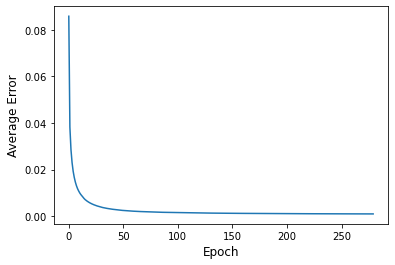

In [13]:
# Saving and plotting MSE
history = model_train.history

import pickle
with open('./models/history_256.pkl','wb') as f:
    pickle.dump(history,f)

plt.plot(history['loss'])
plt.ylabel('Average Error',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.savefig('./img/256/loss.png')
plt.show()

In [14]:
# saving model
full_model.save("./models/singleAE_256.h5")

In [15]:
# Average reconstruction error

train_loss=full_model.evaluate(train_x_scaled,train_x_scaled)[0]
val_loss=full_model.evaluate(val_x_scaled,val_x_scaled)[0]
test_loss=full_model.evaluate(test_x_scaled,test_x_scaled)[0]

119/119 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023


In [16]:
train_out = full_model.predict(train_x_scaled)
val_out = full_model.predict(val_x_scaled)
test_out = full_model.predict(test_x_scaled)

119/119 [==============================] - 0s 1ms/step


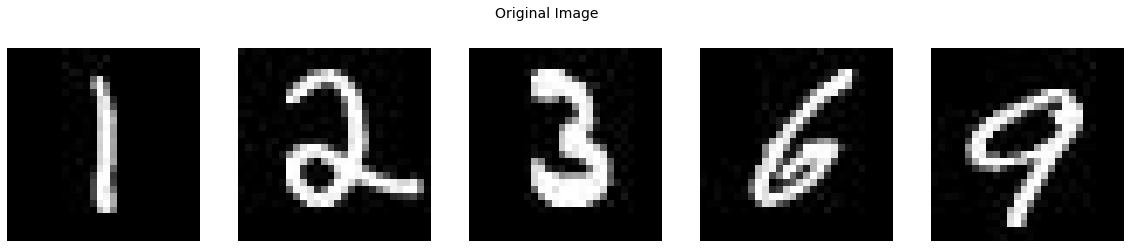

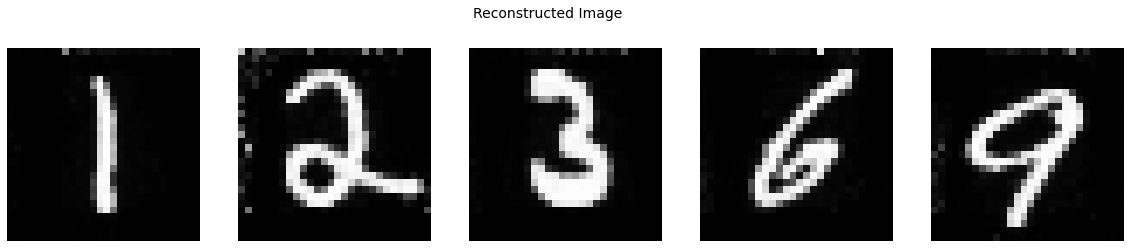

In [17]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for i,ax in enumerate(axes.flatten()):
    j=2277*i
    ax.imshow(train_x[j],cmap='gray')     # original image
    ax.axis('off')
fig.suptitle('Original Image',fontsize=14)
plt.savefig('./img/256/org.png')
plt.show()
plt.close()
fig,axes = plt.subplots(1,5,figsize=(20,4))
for i,ax in enumerate(axes.flatten()):
    j=2277*i
    recon = cv2.normalize(train_out[j].reshape(28,28),None,255,0,cv2.NORM_MINMAX,cv2.CV_8U)   # reconstructed image
    ax.imshow(recon,cmap='gray')    
    ax.axis('off')
fig.suptitle('Reconstructed Image',fontsize=14)
plt.savefig('./img/256/recon.png')
plt.show()
plt.close()

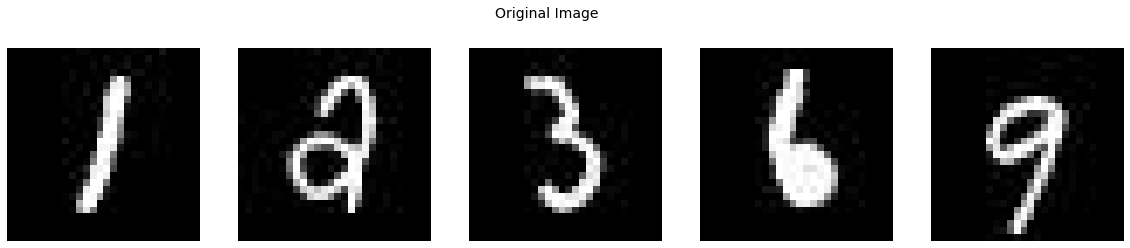

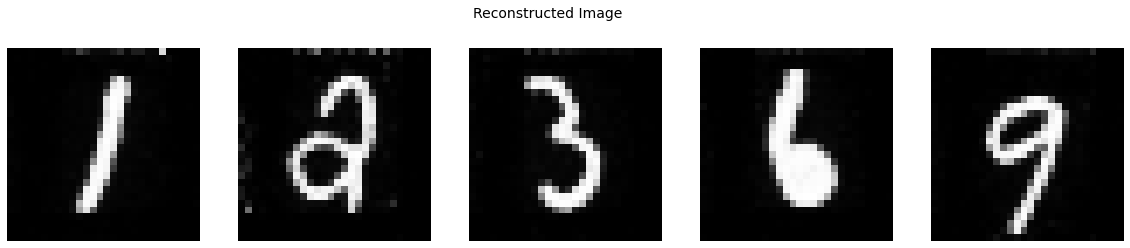

In [19]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for i,ax in enumerate(axes.flatten()):
    j=759*i
    ax.imshow(val_x[j],cmap='gray')     # original image
    ax.axis('off')
fig.suptitle('Original Image',fontsize=14)
plt.savefig('./img/256/org_val.png')
plt.show()
plt.close()
fig,axes = plt.subplots(1,5,figsize=(20,4))
for i,ax in enumerate(axes.flatten()):
    j=759*i
    recon = cv2.normalize(val_out[j].reshape(28,28),None,255,0,cv2.NORM_MINMAX,cv2.CV_8U)   # reconstructed image
    ax.imshow(recon,cmap='gray')    
    ax.axis('off')
fig.suptitle('Reconstructed Image',fontsize=14)
plt.savefig('./img/256/recon_val.png')
plt.show()
plt.close()

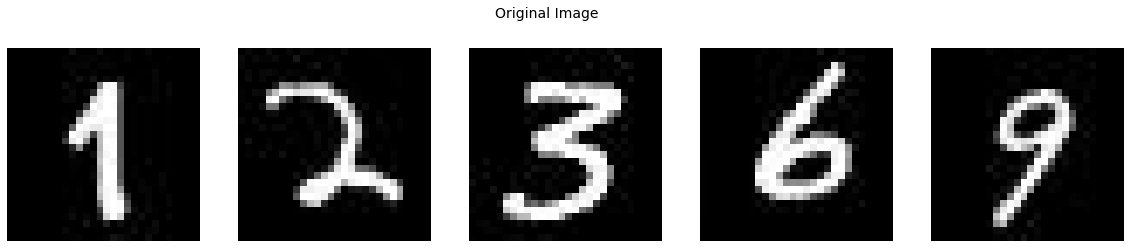

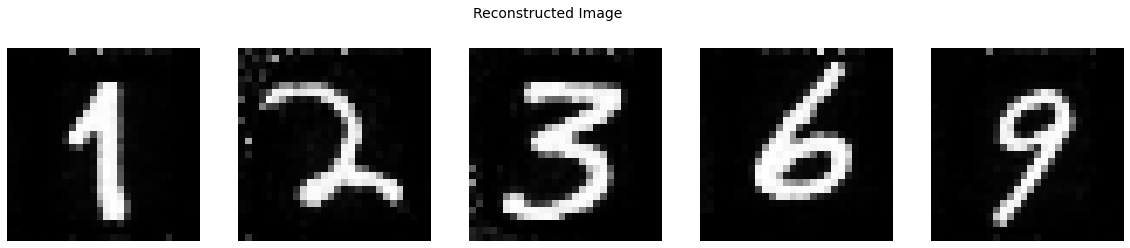

In [21]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for i,ax in enumerate(axes.flatten()):
    j=759*i
    ax.imshow(test_x[j],cmap='gray')     # original image
    ax.axis('off')
fig.suptitle('Original Image',fontsize=14)
plt.savefig('./img/256/org_test.png')
plt.show()
plt.close()
fig,axes = plt.subplots(1,5,figsize=(20,4))
for i,ax in enumerate(axes.flatten()):
    j=759*i
    recon = cv2.normalize(test_out[j].reshape(28,28),None,255,0,cv2.NORM_MINMAX,cv2.CV_8U)   # reconstructed image
    ax.imshow(recon,cmap='gray')    
    ax.axis('off')
fig.suptitle('Reconstructed Image',fontsize=14)
plt.savefig('./img/256/recon_test.png')
plt.show()
plt.close()

## Training a FCNN using compressed representation

In [23]:
# Getting compressed representation of train, validation and test data to further use to train FCNN

encoded_train = encoder.predict([train_x_scaled])
encoded_val = encoder.predict([val_x_scaled])
encoded_test = encoder.predict([test_x_scaled])

119/119 [==============================] - 0s 801us/step


In [24]:
# 3 layer FCNN with sigmoidal activation at hidden layers and softmax at output layer

model1 = keras.Sequential([
        Input(shape=(256,),name='input_layer'),
        Dense(512,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_1"),
        Dense(256,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_2"),
        Dense(128,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_3"),
        Dense(5,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="softmax",name="output_layer")
        ])

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 512)               131584    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               131328    
                                                                 
 hidden_layer_3 (Dense)      (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 5)                 645       
                                                                 
Total params: 296,453
Trainable params: 296,453
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Setting optimiser
opt_Adam = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name="Adam")

# compiling model
model1.compile(optimizer=opt_Adam,loss="categorical_crossentropy",metrics=["accuracy"])

# setting convergence criterion
my_callbacks = EarlyStopping(monitor='loss',min_delta=0.0001,patience=10,verbose=1)

In [27]:
# fitting model
FCNN1_train=model1.fit(encoded_train,train_y,batch_size=32,epochs=10000,callbacks=my_callbacks,verbose="auto",
         validation_data=(encoded_val,val_y),shuffle=True)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.5526 - accuracy: 0.8294 - val_loss: 0.2464 - val_accuracy: 0.9228
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1793 - accuracy: 0.9464 - val_loss: 0.1615 - val_accuracy: 0.9478
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1415 - accuracy: 0.9572 - val_loss: 0.1512 - val_accuracy: 0.9505
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9649 - val_loss: 0.1480 - val_accuracy: 0.9507
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9737 - val_loss: 0.1183 - val_accuracy: 0.9599
Epoch 6/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9770 - val_loss: 0.2027 - val_accuracy: 0.9315
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.1461 - val_ac

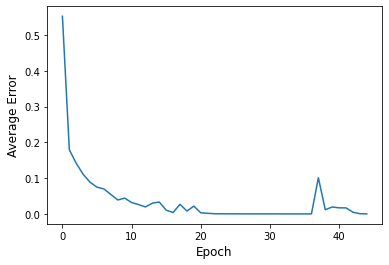

In [28]:
# Average error plot on train data
history = FCNN1_train.history

with open('./models/256/history_FCNN1.pkl','wb') as f:
    pickle.dump(history,f)

plt.plot(history['loss'])
plt.ylabel('Average Error',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.savefig('./models/256/loss1.png')
plt.show()

In [29]:
# saving model
model1.save("./models/256/FCNN1.h5")

In [30]:
# Accuracy and loss on validation data
val_loss,val_acc=model1.evaluate(encoded_val,val_y)

print('Validation loss: {} \t Validation accuracy: {}'.format(val_loss,val_acc))

119/119 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9792
Validation loss: 0.10152354836463928 	 Validation accuracy: 0.9791831374168396


In [31]:
# 4 layer FCNN with sigmoidal activation at hidden layers and softmax at output layer

model2 = keras.Sequential([
        Input(shape=(256,),name='input_layer'),
        Dense(512,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_1"),
        Dense(256,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_2"),
        Dense(128,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_3"),
        Dense(64,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_4"),
        Dense(5,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="softmax",name="output_layer")
        ])

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 512)               131584    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               131328    
                                                                 
 hidden_layer_3 (Dense)      (None, 128)               32896     
                                                                 
 hidden_layer_4 (Dense)      (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 5)                 325       
                                                                 
Total params: 304,389
Trainable params: 304,389
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Setting optimiser
opt_Adam = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name="Adam")

# compiling model
model2.compile(optimizer=opt_Adam,loss="categorical_crossentropy",metrics=["accuracy"])

# setting convergence criterion
my_callbacks = EarlyStopping(monitor='loss',min_delta=0.0001,patience=10,verbose=1)

In [34]:
# fitting model
FCNN2_train=model2.fit(encoded_train,train_y,batch_size=32,epochs=10000,callbacks=my_callbacks,verbose="auto",
         validation_data=(encoded_val,val_y),shuffle=True)

Epoch 1/10000
356/356 [==============================] - 2s 4ms/step - loss: 0.4854 - accuracy: 0.8386 - val_loss: 0.2140 - val_accuracy: 0.9304
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.9481 - val_loss: 0.1457 - val_accuracy: 0.9557
Epoch 3/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.1340 - accuracy: 0.9573 - val_loss: 0.1383 - val_accuracy: 0.9568
Epoch 4/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.1028 - accuracy: 0.9675 - val_loss: 0.1316 - val_accuracy: 0.9568
Epoch 5/10000
356/356 [==============================] - 3s 10ms/step - loss: 0.0857 - accuracy: 0.9733 - val_loss: 0.1181 - val_accuracy: 0.9647
Epoch 6/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.0750 - accuracy: 0.9756 - val_loss: 0.1100 - val_accuracy: 0.9668
Epoch 7/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.0617 - accuracy: 0.9820 - val_loss: 0.1343 - val_a

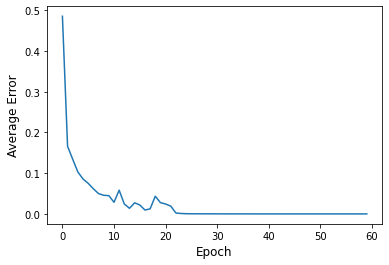

In [35]:
# Average error plot on train data
history = FCNN2_train.history

with open('./models/256/history_FCNN2.pkl','wb') as f:
    pickle.dump(history,f)

plt.plot(history['loss'])
plt.ylabel('Average Error',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.savefig('./models/256/loss2.png')
plt.show()

In [36]:
# saving model
model2.save("./models/256/FCNN2.h5")

In [37]:
# Accuracy and loss on validation data
val_loss,val_acc=model2.evaluate(encoded_val,val_y)
print('Validation loss: {} \t Validation accuracy: {}'.format(val_loss,val_acc))

119/119 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9779
Validation loss: 0.15651516616344452 	 Validation accuracy: 0.9778656363487244


In [38]:
# 5 layer FCNN with sigmoidal activation at hidden layers and softmax at output layer

model3 = keras.Sequential([
        Input(shape=(256,),name='input_layer'),
        Dense(512,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_1"),
        Dense(256,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_2"),
        Dense(128,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_3"),
        Dense(64,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_4"),
        Dense(32,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="sigmoid",name="hidden_layer_5"),
        Dense(5,kernel_initializer=weights_ini,bias_initializer=bias_ini,activation="softmax",name="output_layer")
        ])

In [39]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 512)               131584    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               131328    
                                                                 
 hidden_layer_3 (Dense)      (None, 128)               32896     
                                                                 
 hidden_layer_4 (Dense)      (None, 64)                8256      
                                                                 
 hidden_layer_5 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 5)                 165       
                                                                 
Total params: 306,309
Trainable params: 306,309
Non-tr

In [40]:
# Setting optimiser
opt_Adam = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name="Adam")

# compiling model
model3.compile(optimizer=opt_Adam,loss="categorical_crossentropy",metrics=["accuracy"])

# setting convergence criterion
my_callbacks = EarlyStopping(monitor='loss',min_delta=0.0001,patience=10,verbose=1)

In [41]:
# fitting model
FCNN3_train=model3.fit(encoded_train,train_y,batch_size=32,epochs=10000,callbacks=my_callbacks,verbose="auto",
         validation_data=(encoded_val,val_y),shuffle=True)

Epoch 1/10000
356/356 [==============================] - 2s 4ms/step - loss: 0.5992 - accuracy: 0.8189 - val_loss: 0.2161 - val_accuracy: 0.9404
Epoch 2/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.1886 - accuracy: 0.9463 - val_loss: 0.1656 - val_accuracy: 0.9507
Epoch 3/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.1434 - accuracy: 0.9584 - val_loss: 0.1778 - val_accuracy: 0.9431
Epoch 4/10000
356/356 [==============================] - 2s 6ms/step - loss: 0.1116 - accuracy: 0.9668 - val_loss: 0.1435 - val_accuracy: 0.9573
Epoch 5/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.1006 - accuracy: 0.9702 - val_loss: 0.1240 - val_accuracy: 0.9615
Epoch 6/10000
356/356 [==============================] - 2s 5ms/step - loss: 0.0905 - accuracy: 0.9730 - val_loss: 0.1408 - val_accuracy: 0.9578
Epoch 7/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.1724 - val_ac

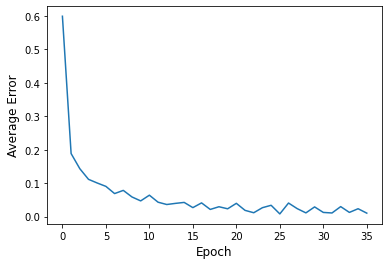

In [42]:
# Average error plot on train data
history = FCNN3_train.history

with open('./models/256/history_FCNN3.pkl','wb') as f:
    pickle.dump(history,f)

plt.plot(history['loss'])
plt.ylabel('Average Error',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.savefig('./models/256/loss3.png')
plt.show()

In [43]:
# saving model
model3.save("./models/256/FCNN3.h5")

In [44]:
# Accuracy and loss on validation data
val_loss,val_acc=model3.evaluate(encoded_val,val_y)
print('Validation loss: {} \t Validation accuracy: {}'.format(val_loss,val_acc))

119/119 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9736
Validation loss: 0.11177591979503632 	 Validation accuracy: 0.9736495614051819


## Model accuracy and confusion matrix for best selected architecture

In [10]:
from keras import models

best=models.load_model("./models/64/FCNN2.h5")

# get weights of best model
wts = best.get_weights()

# create a Keras model with same architecture as best model and set its weights equal to the best model weights

best_model = keras.Sequential([
        Input(shape=(64,),name='input_layer'),
        Dense(512,activation="sigmoid",name="hidden_layer_1"),
        Dense(256,activation="sigmoid",name="hidden_layer_2"),
        Dense(128,activation="sigmoid",name="hidden_layer_3"),
        Dense(64,activation="sigmoid",name="hidden_layer_4"),
        Dense(5,activation="softmax",name="output_layer")
        ])

# Setting optimiser ( select best optimiser by comparing model complexity and validation accuracy )
opt_Adam = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name="Adam")

best_model.set_weights(wts)

# compile the model

best_model.compile(optimizer=opt_Adam,loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
from tensorflow.math import confusion_matrix

# Testing on train data
train_metric=best_model.evaluate(encoded_train,train_y)
print("Train loss: {} \t Train accuracy: {}".format(train_metric[0],train_metric[1]))

# Testing on validation data
val_metric=best_model.evaluate(encoded_val,val_y)
print("Validation loss: {} \t Validation accuracy: {}".format(val_metric[0],val_metric[1]))

# Testing on test data
test_metric=best_model.evaluate(encoded_test,test_y)
print("Test loss: {} \t Test accuracy: {}".format(test_metric[0],test_metric[1]))

test_pred=best_model.predict(encoded_test,verbose=1)
pred_y=np.argmax(test_pred,axis=1)

# confusion matrix for test data
test_y_label = np.argmax(test_y,axis=1)
conf_mat=confusion_matrix(test_y_label,pred_y)
print(conf_mat)

NameError: name 'encoded_train' is not defined

## Weight visualization

In [13]:
from keras import models

best=models.load_model("./models/singleAE_64.h5")

# get weights of best model
wts = best.get_weights()

# create a Keras model with same architecture as best model and set its weights equal to the best model weights

# single hidden layer autoencoder
inputs = Input(shape=(784,),name='input_layer')
l1=Dense(64, activation = 'sigmoid',name='middle_layer')(inputs)
outputs = Dense(784, activation = 'sigmoid', name='output_layer')(l1)

full_model = Model(inputs=inputs, outputs=outputs)
encoder = Model(inputs=inputs, outputs=l1)
decoder = Model(inputs=l1, outputs=outputs)

# Setting optimiser ( select best optimiser by comparing model complexity and validation accuracy )
opt_Adam = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name="Adam")

full_model.set_weights(wts)

# compile the model

full_model.compile(optimizer=opt_Adam,loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
w_ij=full_model.layers[1].get_weights()    # weights between input and hidden layer 1 (bottleneck layer)
w_ij[0].shape

(784, 64)

In [15]:
from numpy.linalg import norm
wts1=[]
for w in w_ij[0].T:
    w=w/norm(w)
    wts1.append(w.reshape(28,28))

wts1 = np.array(wts1)
wts1.shape

(64, 28, 28)

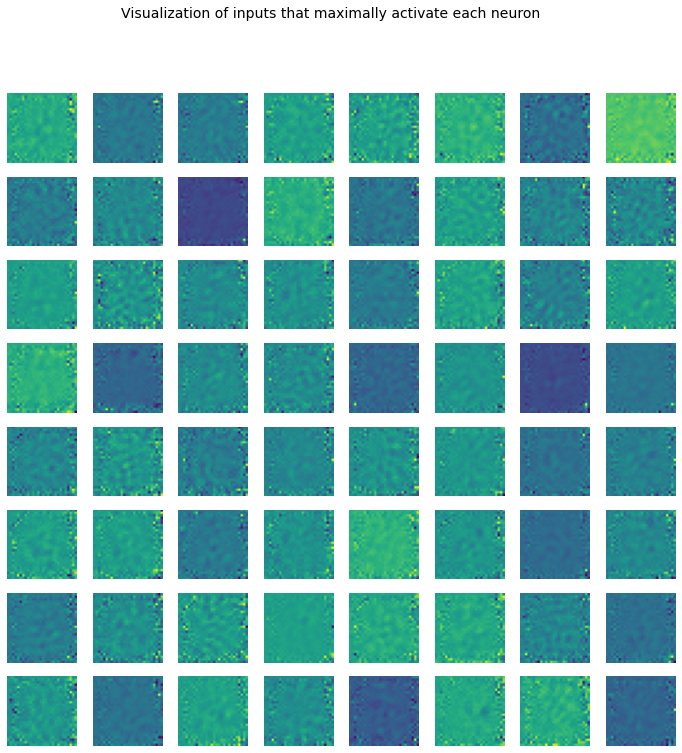

In [17]:
fig,axes = plt.subplots(8,8,figsize=(12,12))
for i,ax in enumerate(axes.flatten()):
    j = i
    #ax.set_title("Node no: "+str(j),fontsize=12)
    ax.imshow(wts1[j])
    ax.axis('off')
fig.suptitle('Visualization of inputs that maximally activate each neuron',fontsize=14)
plt.savefig('./img/64/wts3.png')
plt.show()
plt.close()